Rodrigo García Salado

---
### PRÁCTICA 2
---

Ponemos los imports

In [8]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

Importamos el archivo

In [9]:
# Cargamos el archivo
data_df = pd.read_csv("Practica2/semillas.csv") 

Ahora observamos cuantos y qué tipo de datos vamos a estar tratando


In [10]:

print('The shape of the data table is:')
print('===============================')
print(data_df.shape)
print()

print('The types of the attributes are:')
print('================================')
data_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(data_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(data_df.isnull().mean())


The shape of the data table is:
(210, 8)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        210 non-null    float64
 1   perimetro   210 non-null    float64
 2   compacidad  210 non-null    float64
 3   longitud    210 non-null    float64
 4   anchura     210 non-null    float64
 5   asimetria   210 non-null    float64
 6   surco       210 non-null    float64
 7   clase       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB

How many missing values per attribute:
area          0
perimetro     0
compacidad    0
longitud      0
anchura       0
asimetria     0
surco         0
clase         0
dtype: int64

Fraction of missing values per attribute:
area          0.0
perimetro     0.0
compacidad    0.0
longitud      0.0
anchura       0.0
asimetria     0.0
surco         0.0
clase     

In [11]:
# Separar características y etiquetas
X = data_df.drop(columns=['clase']) 
y = data_df['clase']

# Lista de scalers a comparar
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}



creamos la figura para comparar

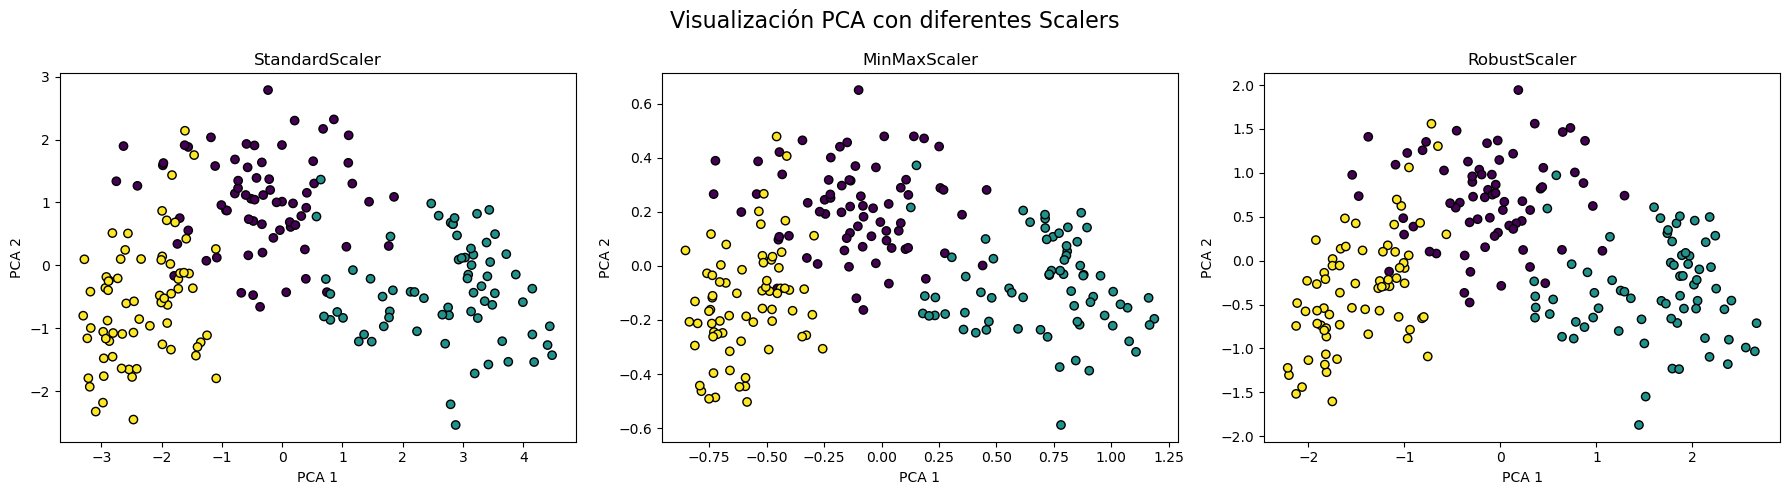

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Visualización PCA con diferentes Scalers", fontsize=16)

for ax, (name, scaler) in zip(axes, scalers.items()):
    # Pipeline con scaler + PCA
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2))
    ])

    # Transformar los datos
    X_pca = pipeline.fit_transform(X)

    # Graficar
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
    ax.set_title(name)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Mostrar leyenda fuera del bucle
plt.tight_layout()
plt.show()
